
# <font size="6"> Predict Whether A Candidate is A Real Pulsar


# <font size="5"> 1.Introduction

**Pulsars** are rare neutron stars, as probes of space-time, the interstellar medium and the state of matter, which are very important for the study and development of natural sciences(Wikipedia). The search for pulsars relies mainly on detecting signals emitted by periodic broadband radio emission patterns (averaged over multiple rotations) as they rotate at high speeds. However, in practice, all detections are caused by radio frequency interference (RFI) and noise, so it is difficult to find legitimate signals. Hence, the search for real pulsars is challenging. 

**Our question is could we accurately predict a real pulsar using predictors Mean_IP, ExcessKurtosis_IP and ExcessKurtosis_DS?**

HTRU2 is a dataset describing a sample of pulsar candidates collected during the High Temporal Resolution Universe Survey (South). It contains 16,259 spurious examples caused by RFI/noise and 1,639 real pulsar examples. Eight continuous variables describe each candidate as below and first four of them are statistics obtained from integrated pulse profile and the remaining are from DM-SNR curve.This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency.Please see the information as below,
* Mean of the integrated profile.
* Standard deviation of the integrated profile.
* Excess kurtosis of the integrated profile.
* Skewness of the integrated profile.
* Mean of the DM-SNR curve.
* Standard deviation of the DM-SNR curve.
* Excess kurtosis of the DM-SNR curve.
* Skewness of the DM-SNR curve.
* Class:1 means real pulsar and 0 otherwise.

**Project Model Selection**: We choose classification algorithms - K nearest neighbors algorithms for our project. As we would like to predict the "Class" of a candidate and "Class" is a categorical class.

# <font size="5"> 2.Methods & Results

Load the `tidyverse`, `tidymodels` and `GGally` package for data analysis.

In [31]:
library(tidyverse)
library(tidymodels)      
install.packages("GGally")                    
library("GGally")
library(rvest)
install.packages("vcd")
library(vcd)
library(ggplot2)
# install.packages("reticulate")
# library(reticulate)
# py_available()
# repl_python()

# py_install(packages ="pandas")
# py_install(packages="numpy")
# np <- import("numpy") 
# pd <- import ("pandas")
# plt <- import(matplotlib.pyplot) 
# matplotlib inline
# from statsmodels.graphics.mosaicplot import mosaic
# from matplotlib.patches import Patch
# import itertools
# from collections import deque



Warning message in install.packages("GGally"):
“installation of package ‘GGally’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Set the seed only once before loading data to gurantee our analysis to be reproducible.

In [2]:
set.seed(1)

Read the file from online using `read_table2`.Load the data and add column names using `rename` manually to clean and wrangle data into tidy format; Also factor our predictor for classification. 

In [3]:
pulsar_raw_data <- read_table2("https://raw.githubusercontent.com/JeanetteOfficial/ActiveDSCI100_Group_006-1_proj/main/data/HTRU_2.txt",
                          col_names = FALSE) 
pulsar_raw_data <- rename(pulsar_raw_data, "Mean_IP" = X1,
                         "SD_IP" = X2,
                         "ExcessKurtosis_IP" = X3,
                         "Skewness_IP" = X4,
                         "Mean_DS" = X5,
                         "SD_DS" = X6,
                         "ExcessKurtosis_DS" = X7,
                         "Skewness_DS" = X8,
                         "Class" = X9) 

pulsar_raw_data <- mutate(pulsar_raw_data, Class = as_factor(case_when(Class == 1 ~ "pulsar",
                                                                      TRUE ~ "rfi_noise")))
head(pulsar_raw_data)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double()
)



Mean_IP,SD_IP,ExcessKurtosis_IP,Skewness_IP,Mean_DS,SD_DS,ExcessKurtosis_DS,Skewness_DS,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,rfi_noise
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,rfi_noise
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,rfi_noise
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,rfi_noise
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,rfi_noise
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,rfi_noise


**Table 1**: Preview the raw data after factor the Class

We use  `glimpse` to inspect the data, as we have a lot of columns. In such way, it prints the data such that the columns go down the page (instead of across). And we can easily view our 9 variables.

In [4]:
glimpse(pulsar_raw_data)

Rows: 17,898
Columns: 9
$ Mean_IP           <dbl> 140.56250, 102.50781, 103.01562, 136.75000, 88.7265…
$ SD_IP             <dbl> 55.68378, 58.88243, 39.34165, 57.17845, 40.67223, 4…
$ ExcessKurtosis_IP <dbl> -0.23457141, 0.46531815, 0.32332837, -0.06841464, 0…
$ Skewness_IP       <dbl> -0.69964840, -0.51508791, 1.05116443, -0.63623837, …
$ Mean_DS           <dbl> 3.1998328, 1.6772575, 3.1212375, 3.6429766, 1.17892…
$ SD_DS             <dbl> 19.110426, 14.860146, 21.744669, 20.959280, 11.4687…
$ ExcessKurtosis_DS <dbl> 7.975532, 10.576487, 7.735822, 6.896499, 14.269573,…
$ Skewness_DS       <dbl> 74.24222, 127.39358, 63.17191, 53.59366, 252.56731,…
$ Class             <fct> rfi_noise, rfi_noise, rfi_noise, rfi_noise, rfi_noi…


**Table 2**: Preview the row data with columns go down the page

Explore the data using  `group_by`,  `summarize`,  `n` function within  `summarize` to find the number and percentage of pulsar and rfi_noise observations in our data set. And find we have 1639 (9%) pulsar and 16259 (91%) rfi_noise observations. It is predicted as there should be rare real pulsar.

In [5]:
pulsar_proportions <- pulsar_raw_data %>%
                      group_by(Class) %>%
                      summarize(n=n()) %>%
                      mutate(percent = 100*n/nrow(pulsar_raw_data))
pulsar_proportions

`summarise()` ungrouping output (override with `.groups` argument)



Class,n,percent
<fct>,<int>,<dbl>
rfi_noise,16259,90.842552
pulsar,1639,9.157448


**Table 3** : Percentage of Class0 and Class1 with raw data

Using  `initial_split ` split the train/test data for training an accurate model and achieving accurate evaluation for the model. As we experimented with different splits, we find that split the training and testing data into 75% vs 25% would be the most appropriate solution. And `glimpse` to inspect the training data.

In [6]:
pulsar_split <- initial_split(pulsar_raw_data,prop=0.75,strata = Class)
pulsar_train <- training(pulsar_split)
pulsar_test <- testing(pulsar_split)
glimpse(pulsar_train)

Rows: 13,424
Columns: 9
$ Mean_IP           <dbl> 140.56250, 102.50781, 103.01562, 136.75000, 88.7265…
$ SD_IP             <dbl> 55.68378, 58.88243, 39.34165, 57.17845, 40.67223, 4…
$ ExcessKurtosis_IP <dbl> -0.234571412, 0.465318154, 0.323328365, -0.06841463…
$ Skewness_IP       <dbl> -0.69964840, -0.51508791, 1.05116443, -0.63623837, …
$ Mean_DS           <dbl> 3.199833, 1.677258, 3.121237, 3.642977, 1.178930, 1…
$ SD_DS             <dbl> 19.11043, 14.86015, 21.74467, 20.95928, 11.46872, 1…
$ ExcessKurtosis_DS <dbl> 7.975532, 10.576487, 7.735822, 6.896499, 14.269573,…
$ Skewness_DS       <dbl> 74.24222, 127.39358, 63.17191, 53.59366, 252.56731,…
$ Class             <fct> rfi_noise, rfi_noise, rfi_noise, rfi_noise, rfi_noi…


**Table 4**: Preview the training data

We use `group_by`,  `summarize` and  `n` function within  `summarize` to find the perentange of Class1 and Class0 in `pulsar_train`. And we see about 1291(9%) are pulsar and 12183 (91%) are rfi_noise, indicating that our class proportions were roughly preserved when we split the data, which means we have enough data in each proportion in the training data. This also remind us that we need to balance the test data first to use them.

In [7]:
pulsar_train_proportions <- pulsar_train %>%
                      group_by(Class) %>%
                      summarize(n=n()) %>%
                      mutate(percent = 100*n/nrow(pulsar_train))
pulsar_train_proportions

`summarise()` ungrouping output (override with `.groups` argument)



Class,n,percent
<fct>,<int>,<dbl>
rfi_noise,12183,90.755364
pulsar,1241,9.244636


**Table 5**: Percentage of Class1 and Class0 with training data

Check if there are missing values in training data with `na.omit` . If so, we have to deal with them first, otherwise our data analysis is not accurate. As we can observe above, row count remains the same meaning that there aren't any missing values. Check to see the first six rows of the data with `head`.

In [8]:
na.omit(pulsar_train, cols=c("Mean_IP", "SD_IP", "ExcessKurtosis_IP", "Skewness_IP", 
                             "Mean_DS", "SD_DS", "ExcessKurtosis_DS", "Skewness_DS","Class")) %>%
head(6)
# glimpse(pulsar_train)

Mean_IP,SD_IP,ExcessKurtosis_IP,Skewness_IP,Mean_DS,SD_DS,ExcessKurtosis_DS,Skewness_DS,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,rfi_noise
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,rfi_noise
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,rfi_noise
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,rfi_noise
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,rfi_noise
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,rfi_noise


**Table 6**: Preview the data after checking missing values

`summarize` the means of the 8 predictor variables in a table. Therefore, we are able to know whether each data is higher or lower than the average.

In [9]:
mean_pulsar_train <- pulsar_train %>%
summarize(AVG_MeanIP = mean(Mean_IP, na.rm = TRUE),
          AVG_SDIP = mean(SD_IP,na.rm = TRUE),
          AVG_ExcessKurtosisIP = mean(ExcessKurtosis_IP,na.rm = TRUE),
          AVG_SkewnessIP = mean(Skewness_IP,na.rm = TRUE),
          AVG_MeanDS = mean(Mean_DS,na.rm = TRUE),
          AVG_SDDS = mean(SD_DS,na.rm = TRUE),
          AVG_ExcessKurtosisDS = mean(ExcessKurtosis_DS,na.rm = TRUE),
          AVG_SkewnessDS = mean(Skewness_DS,na.rm = TRUE))         
mean_pulsar_train

AVG_MeanIP,AVG_SDIP,AVG_ExcessKurtosisIP,AVG_SkewnessIP,AVG_MeanDS,AVG_SDDS,AVG_ExcessKurtosisDS,AVG_SkewnessDS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
110.9139,46.5429,0.4840392,1.79401,12.69251,26.34225,8.314097,105.3613


**Table 7**: The means of all variables

# <font size="4">Choosing Predictive Variables

**Intuition**: 

* Except for the Class, we have 8 continuous variables describing each candidate. First four are statistics obtained from integrated pulse profile. The pulse profile refers to the curve of the periodic variation of the pulsar's radiation signal with time, also known as the light curve. A single pulse signal is very unstable, the intensity of the pulse is variable, and sometimes even disappears, but the average value of thousands of pulses has a very stable periodicity(corr_ee). Therefore, we think the mean of the integrated pulse profile should be useful for judge the real pulsar. 

* The remaining are from DM-SNR(Dispersion Measure-Signal to Noise Ratio) curve. The DM-SNR curve records the relationship of SNR to DM, and the dispersion curve shows the corresponding SNR of the pulsed curve when different dispersion values are used for dedispersion. In the case of a pulsed signal, the peak of the curve will appear at a non-zero position, while the curve for a non-pulse signal will have no apparent peak or peak at zero. (Liu. et al,12). Therefore, the Excess Kurtosis of the DM-SNR curve is essential for judge the pulsar.







Using `ggpairs` to compare the distribution of 8 predictor variables in our dataset and to check with our intuition above. And it seems that the mean of the Integrated pulsar profile and the Excess Kurtosis are well correlated to pulsar. However, the other six variables also work well. So we want to use histogram to check again.

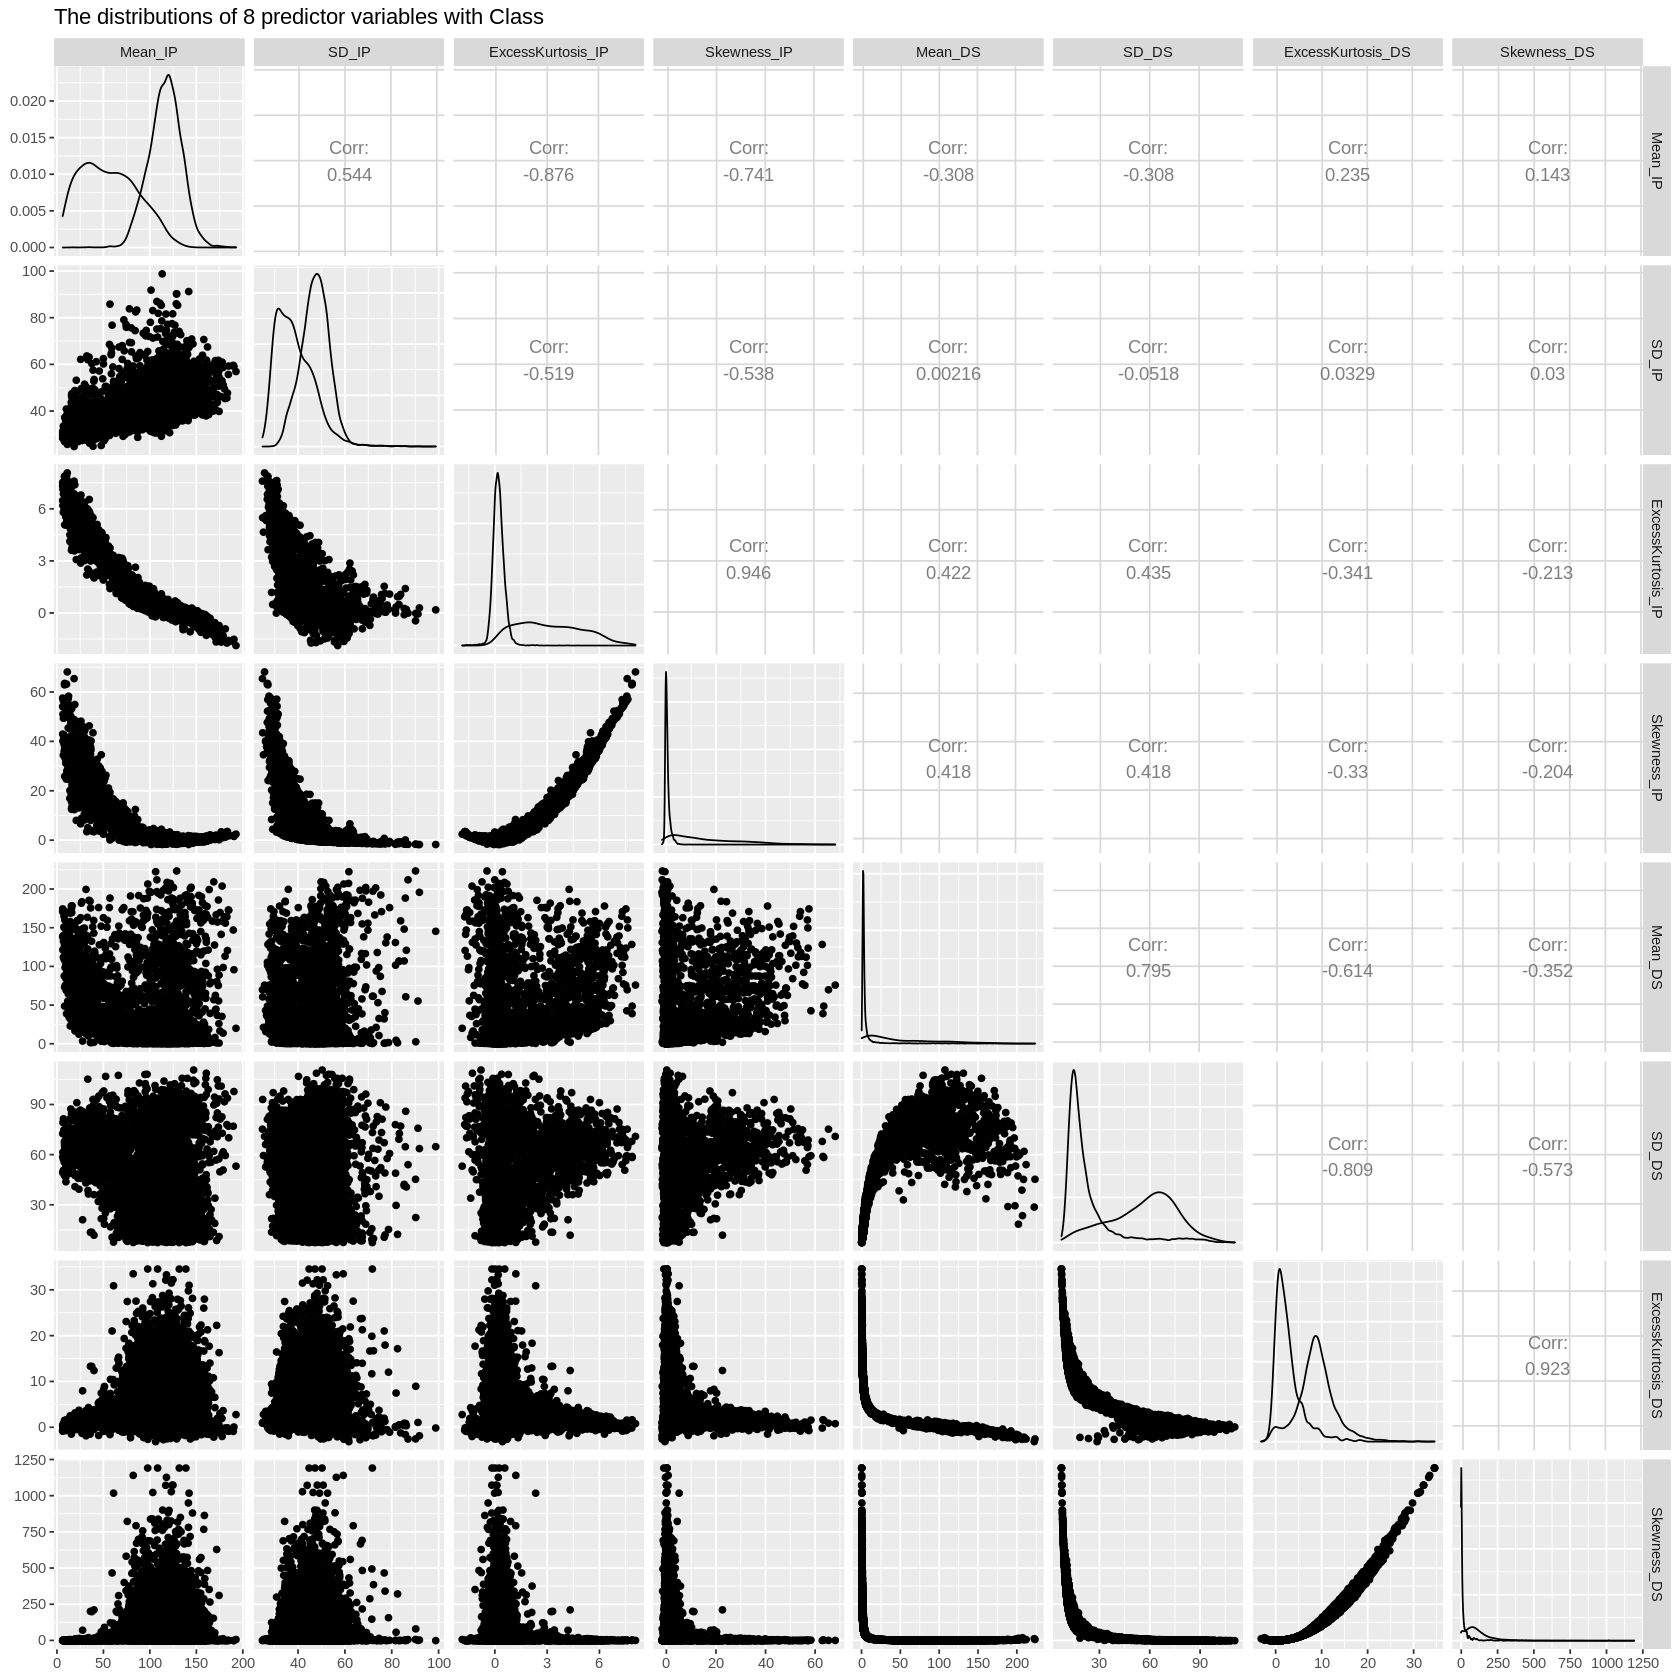

In [10]:
options(repr.plot.width = 14, repr.plot.height = 14)

pulsar_dist_plot <- pulsar_train %>%
   ggpairs(pulsar_train, columns = 1:8, aes(colour=Class),title="The distributions of 8 predictor variables with Class")
pulsar_dist_plot

pulsar_dist_plot <- pulsar_dist_plot +
                       theme(text = element_text(size = 20))

**Figure 1**: Compare the distribution of all variables

Using `geom_histogram` to visualize the distribution of Mean_IP with Class. The higher of the Mean_IP, the higher possibility for it to be a real pulsar.

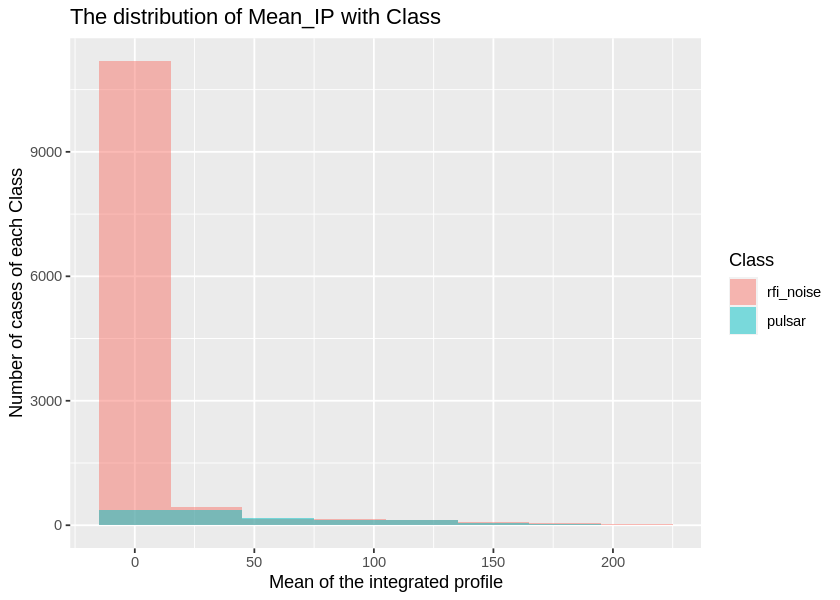

In [11]:
options(repr.plot.width = 7, repr.plot.height = 5) 
pulsar_train %>% 
    ggplot(aes(x= Mean_DS, fill = Class)) +
    geom_histogram(alpha = 0.5, position = "identity", binwidth=30) +
    labs(x = "Mean of the integrated profile", 
       y = "Number of cases of each Class", 
       fill = "Class")+
ggtitle("The distribution of Mean_IP with Class")

**Figure 2**: The distribution of mean of the integrated profile with Class

Using `geom_histogram` to see the distribution of SD_IP with Class. It seems that if the SD_IP is lower than 40, then there is high possibility for it to be a real pulsar.

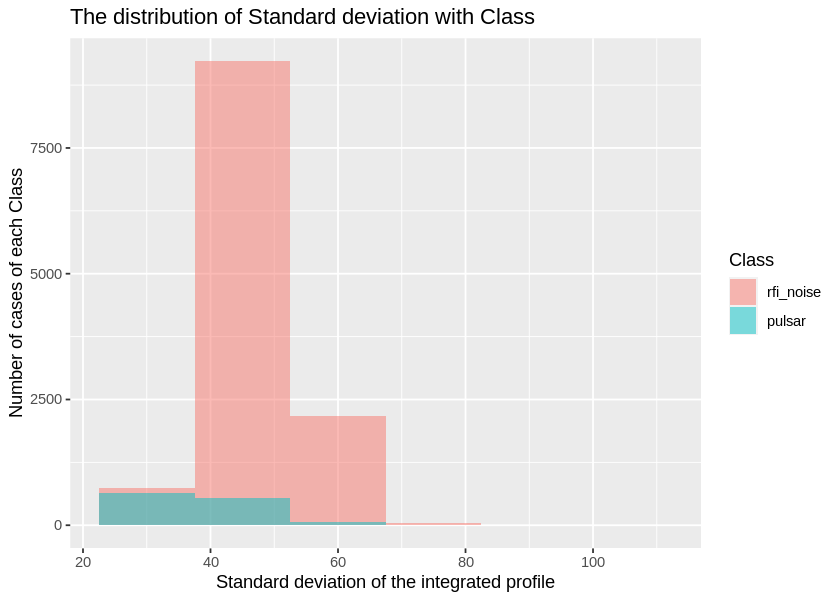

In [12]:
#use histogram to see the distribution of SD_IP
options(repr.plot.width = 7, repr.plot.height = 5) 
pulsar_train %>% 
    ggplot(aes(x= SD_IP, fill = Class)) +
    geom_histogram(alpha = 0.5, position = "identity", binwidth=15) +
    labs(x = "Standard deviation of the integrated profile", 
       y = "Number of cases of each Class", 
       fill = "Class")+
ggtitle("The distribution of Standard deviation with Class")

**Figure 3**: The distribution of standard deviation of the integrated profile with Class

Using `geom_histogram` to see the distribution of Skewness_IP with Class. A real pulsar has higher skewness.

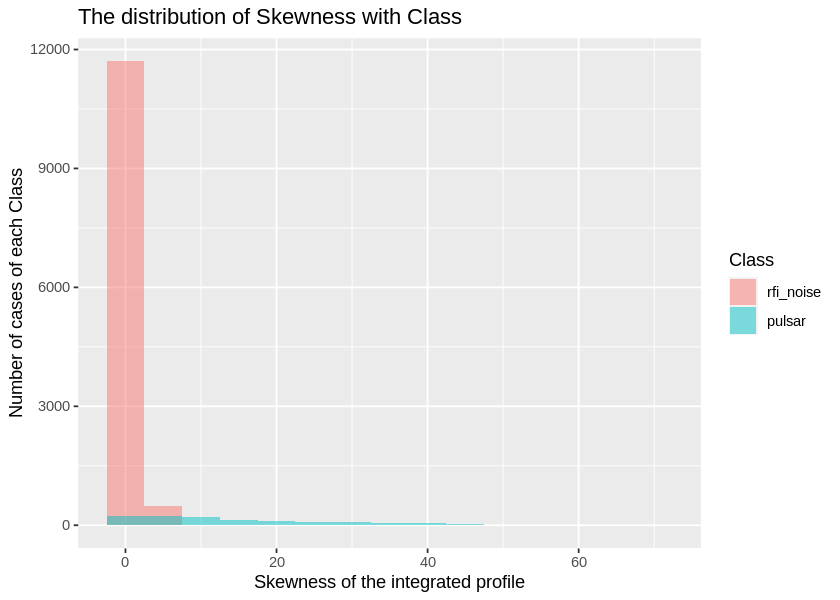

In [13]:
options(repr.plot.width = 7, repr.plot.height = 5) 
pulsar_train %>% 
    ggplot(aes(x= Skewness_IP, fill = Class)) +
    geom_histogram(alpha = 0.5, position = "identity", binwidth=5) +
    labs(x = "Skewness of the integrated profile", 
       y = "Number of cases of each Class", 
       fill = "Class")+
ggtitle("The distribution of Skewness with Class")

**Figure 4**: The distribution of skewness the integrated profile with Class

Using `geom_histogram` to see the distribution of ExcessKurtosis_IP with Class. A real pulsar has higher excess kurtosis.

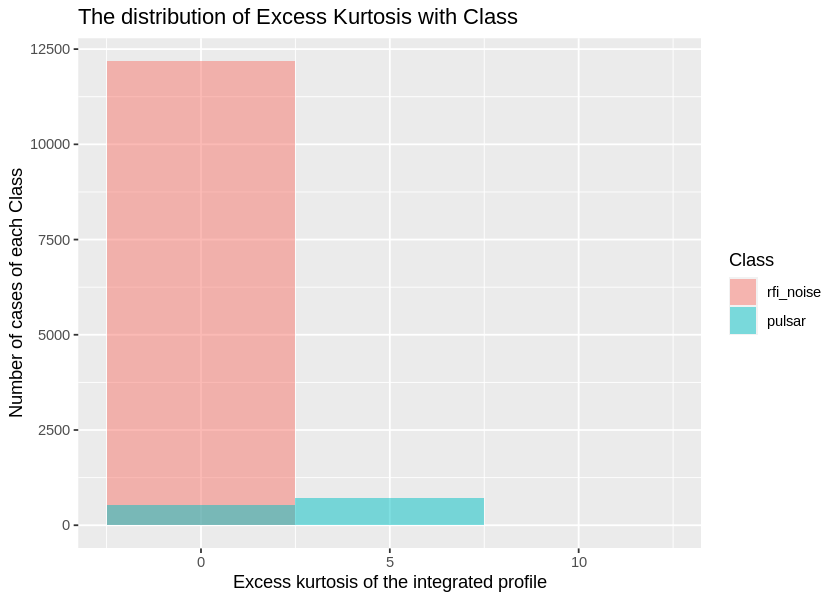

In [14]:
options(repr.plot.width = 7, repr.plot.height = 5) 
pulsar_train %>% 
    ggplot(aes(x= ExcessKurtosis_IP, fill = Class)) +
    geom_histogram(alpha = 0.5, position = "identity", binwidth=5) +
    labs(x = "Excess kurtosis of the integrated profile", 
       y = "Number of cases of each Class", 
       fill = "Class")+
ggtitle("The distribution of Excess Kurtosis with Class")

**Figure 5**: The distribution of excess kurtosis of the integrated profile with Class

Using `geom_histogram` to see the distribution of Mean_DS with Class. The higher mean of the DM_SNR, the higher possibility to be a real pulsar.

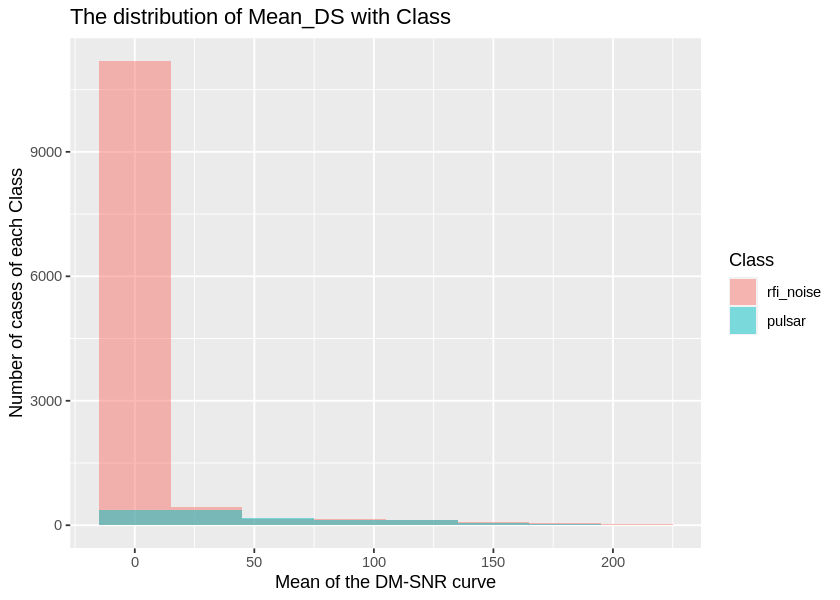

In [15]:
#use histogram to see the distribution of Mean_DS
options(repr.plot.width = 7, repr.plot.height = 5) 
pulsar_train %>% 
    ggplot(aes(x= Mean_DS, fill = Class)) +
    geom_histogram(alpha = 0.5, position = "identity", binwidth=30) +
    labs(x = "Mean of the DM-SNR curve", 
       y = "Number of cases of each Class", 
       fill = "Class")+
ggtitle("The distribution of Mean_DS with Class")

**Figure 6**: The distribution of mean of the DM-SNR curve with Class

Using `geom_histogram` to see the distribution of SD_DS with Class. It is hard to predict pulsar with SD_DS only.

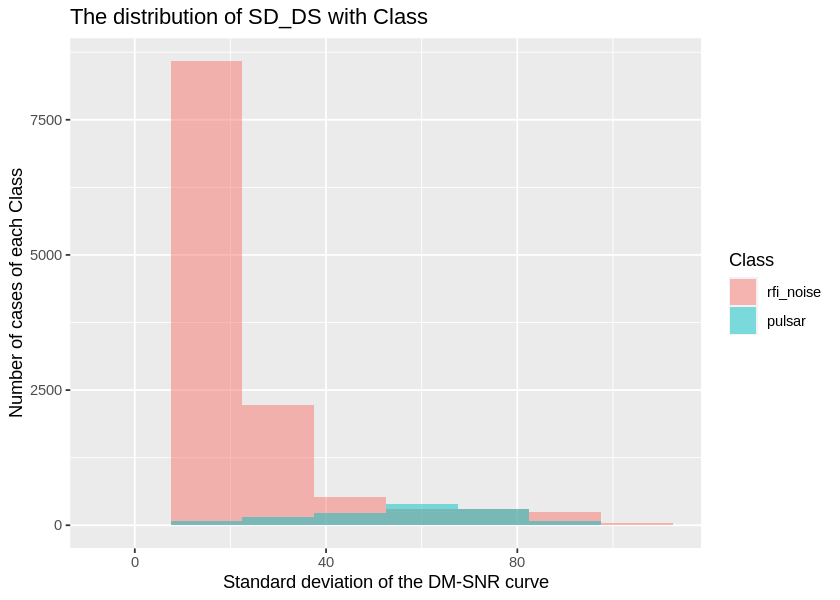

In [16]:
options(repr.plot.width = 7, repr.plot.height = 5) 
pulsar_train %>% 
    ggplot(aes(x= SD_DS, fill = Class)) +
    geom_histogram(alpha = 0.5, position = "identity", binwidth=15) +
    labs(x = "Standard deviation of the DM-SNR curve", 
       y = "Number of cases of each Class", 
       fill = "Class")+
ggtitle("The distribution of SD_DS with Class")

**Figure 7**: The distribution of standard deviation of the DM-SNR curve with Class

Using `geom_histogram` to see the distribution of Skewness_DS with Class. The smaller of the skewness of DM_SNR curve, the high possibility to be a pulsar.

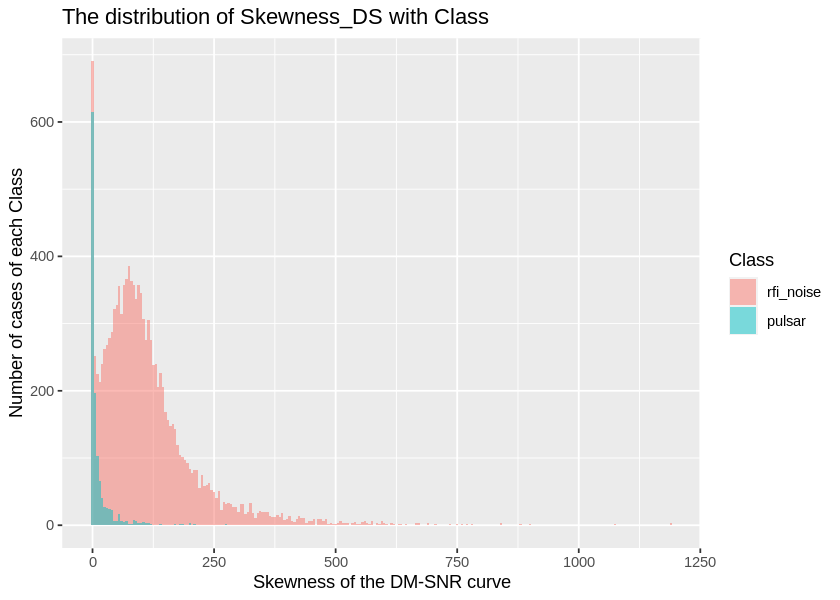

In [17]:
options(repr.plot.width = 7, repr.plot.height = 5) 
pulsar_train %>% 
    ggplot(aes(x= Skewness_DS, fill = Class)) +
    geom_histogram(alpha = 0.5, position = "identity", binwidth=5) +
    labs(x = "Skewness of the DM-SNR curve", 
       y = "Number of cases of each Class", 
       fill = "Class")+
ggtitle("The distribution of Skewness_DS with Class")

**Figure 8**: The distribution of skewness of the DM-SNR curve with Class

Using `geom_histogram` to see the distribution of ExcessKurtosis_DS with Class. The smaller of the excess kurtosis of DM_SNR curve, the high possibility to be a pulsar.

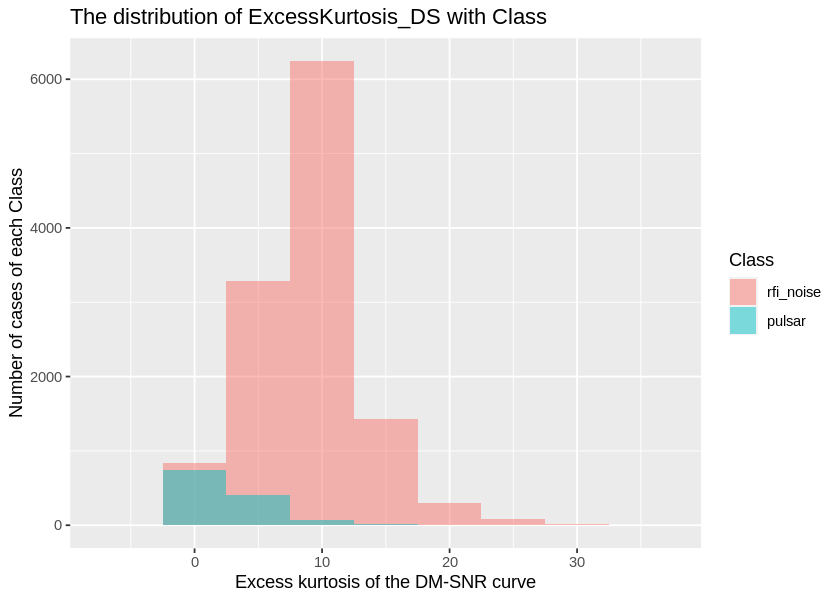

In [18]:
options(repr.plot.width = 7, repr.plot.height = 5) 
pulsar_train %>% 
    ggplot(aes(x= ExcessKurtosis_DS, fill = Class)) +
    geom_histogram(alpha = 0.5, position = "identity", binwidth=5) +
    labs(x = "Excess kurtosis of the DM-SNR curve", 
       y = "Number of cases of each Class", 
       fill = "Class")+
ggtitle("The distribution of ExcessKurtosis_DS with Class")

**Figure 9**: The distribution of excess kurtosis of the DM-SNR curve with Class

After graphing the histogram of 8 variables with Class. We find that ExcessKurtosis and Skewness of integrated pulsar profile are also great predictors. Through the research we find that both kurtosis and skewness are functions of the mean and variance of a distribution and have very similar functional definitions(Shaw). Therefore, we choose Excess Kurtos as we know more about kurtosis. Overall, we have 3 predictors, which are **Mean_IP,ExcessKurtosis_IP,and ExcessKurtosis_DS**.

# <font size="4"> K-nearest neighbors

* To choose the best K, we use 5-fold cross validation (5 as our data is big, therefore 5-fold is the best choice for us) with `tidymodels` and function `vfold_cv`

* K-nearest neighbors is sensitive to the scale of the predictors so we should do some preprocessing to standardize them with training data and create a `recipe` that uses 3 predictors Mean_IP,ExcessKurtosis_IP,and ExcessKurtosis_DS. Besides, as we have 9% vs 91% for Class1 and Class0, which is imbalance. Therefore, we also use `step_upsample` to balance our data.

* A model specification with tuning on the number of neighbours

* Create a workflow analysis with your recipe and model specification. we will use the `tune_grid`function to fit the model for each value in a range of parameter values. In particular, we first create a data frame with a neighbors variable that contains the sequence of values of K to try; below we create the `k_vals` data frame with the neighbors variable containing values from 1 to 100 (stepping by 5) using the seq function. Then we pass that data frame to the grid argument of tune_grid.

* Collect the `metric` from the workflow analysis


In [19]:
pulsar_vfold <- vfold_cv(pulsar_train, v = 5, strata = Class)

pulsar_recipe <- recipe(Class ~ Mean_IP + ExcessKurtosis_IP + ExcessKurtosis_DS, 
                        data = pulsar_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())%>%
  step_upsample(Class, over_ratio = 1, skip = TRUE) 


knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() %>%
                 add_recipe(pulsar_recipe) %>%
                 add_model(knn_spec) %>%
                 tune_grid(resamples = pulsar_vfold, grid = k_vals) %>%
                 collect_metrics()

accuracies <- knn_results %>%
                 filter(.metric == 'accuracy')
accuracies





Warning message:
“`step_upsample()` is deprecated as of recipes 0.1.13.
Please use `themis::step_upsample()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9645409,5,0.0013046014,Model01
6,accuracy,binary,0.9504619,5,0.0010056096,Model02
11,accuracy,binary,0.9314667,5,0.0027710366,Model03
16,accuracy,binary,0.9281891,5,0.0028696999,Model04
21,accuracy,binary,0.9427149,5,0.0014070558,Model05
26,accuracy,binary,0.9488977,5,0.0008895942,Model06
31,accuracy,binary,0.9536652,5,0.0018183339,Model07
36,accuracy,binary,0.9557509,5,0.0017124509,Model08
41,accuracy,binary,0.9564217,5,0.0019081731,Model09


**Table 8**: Accuracies according to different k values

Plot the K vs the accuracy by scatter & line plot

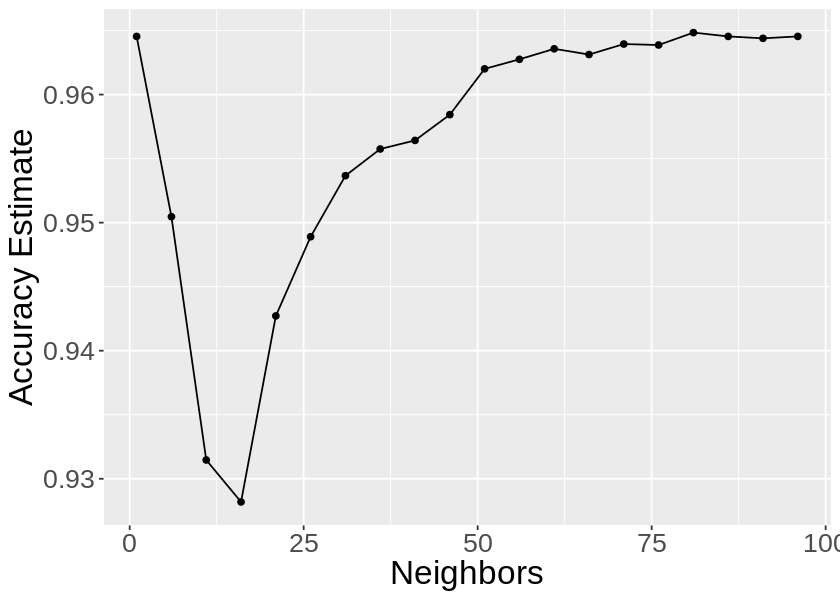

In [20]:
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 20)) 
#                   scale_x_continuous(breaks = seq(0, 20, 2)) +
#                   scale_y_continuous(limits = c(0.7, 0.85))
cross_val_plot

**Figure 10**: Accuracy estimates for different k values

As we can see from the plot above k=1 has the highest accuracy estimate. However, we cannot choose k=1 due to the overfitting. Therefore, we choose number from 71 to 100. From the accuracies above, we know that when k=96, it has the highest accuracy 96.4%. Then we know that our best value is k =96. And since we have large enough data, we would not worry to much about underfitting.

Next, we build our model with best value of K. Then, pass the model specification and the training data set to the `fit()`function. 

In [21]:
pulsar_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 96) %>%
       set_engine("kknn") %>%
       set_mode("classification")

pulsar_fit <- workflow() %>%
             add_recipe(pulsar_recipe) %>%
             add_model(pulsar_spec) %>%
            fit(data = pulsar_train)
pulsar_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

● step_scale()
● step_center()
● step_upsample()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~96, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.06110974
Best kernel: rectangular
Best k: 96

Pass our fitted model and the test dataset to the `predict` function. Then, use the `bind_cols`function to add the column of predictions to the original test data. Use `head` function to see the first 6 rows.

In [22]:
pulsar_test_predictions <- predict(pulsar_fit , pulsar_test) %>%
      bind_cols(pulsar_test)
head(pulsar_test_predictions)


.pred_class,Mean_IP,SD_IP,ExcessKurtosis_IP,Skewness_IP,Mean_DS,SD_DS,ExcessKurtosis_DS,Skewness_DS,Class
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
rfi_noise,119.48438,48.76506,0.03146022,-0.11216757,0.9991639,9.279612,19.206230,479.75657,rfi_noise
rfi_noise,117.94531,45.50658,0.32543756,0.66145946,2.8361204,23.118350,8.943212,82.47559,rfi_noise
rfi_noise,138.17969,51.52448,-0.03185233,0.04679717,6.3302676,31.576347,5.155940,26.14331,rfi_noise
rfi_noise,114.36719,51.94572,-0.09449890,-0.28798409,2.7382943,17.191891,9.050612,96.61190,rfi_noise
rfi_noise,117.36719,53.90861,0.25795344,-0.40504908,6.0183946,24.766123,4.807783,25.52262,rfi_noise
rfi_noise,99.91406,43.91950,0.47572850,0.78148620,0.6195652,9.440976,20.106639,475.68022,rfi_noise


**Table 9**: Preview the testing data after modeling

Compute the accuracy of our classifiers using the `metrics` function from the `tidymodels` package. Specify the `truth` argument with Class. In the `estimate` argument, we put the column name for response variable predictions. And we find our accuracy is 96.13321%.

In [23]:
pulsar_prediction_accuracy <- pulsar_test_predictions %>%
        metrics(truth = Class, estimate = .pred_class) %>%
        filter(.metric == "accuracy")
pulsar_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9613321


**Table 10**: Model accuracy

Look at the confusion matrix for the classifier, using the `conf_mat` function. 

The confusion matrix shows 4050 observations were correctly predicted as Class0, and 317 were correctly predicted as real pulsar(Class1). Therefore the classifier labeled 4050 + 317 = 4367 observations correctly. It also shows that the classifier made some mistakes; in particular, it classified 81 observations as Class0  when they were real pulsar, and 26 observations as Class1 (real pulsar) when they were not.

In [24]:
confusion <- pulsar_test_predictions %>%
             conf_mat(truth = Class, estimate = .pred_class) 
 

confusion

           Truth
Prediction  rfi_noise pulsar
  rfi_noise      3945     42
  pulsar          131    356

**Table 10**: Confusion matrix

Visualize Classification Results

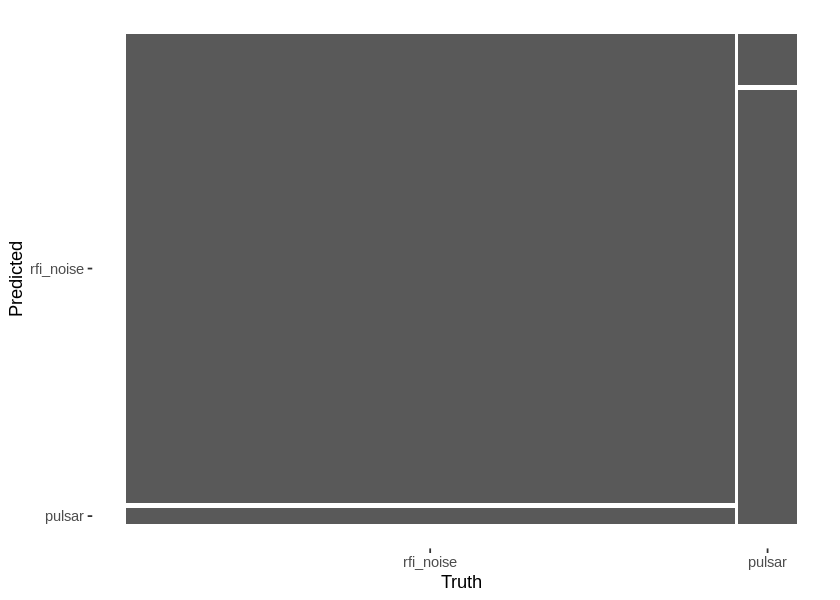

In [42]:
# confusion_matrix <- ggplot(data = pulsar_test_predictions) +
#   geom_mosaic(aes(x = product(Class, .pred_Class), fill = Class)) +   
#   labs(y="Predicted Class", x="Observed Class", title = "rfi_noise vs pulsar") 

# mosaic( ~ Class + .pred_class, data = pulsar_test_predictions,
#        highlighting = "Prediction", highlighting_fill = c("lightblue", "pink"),
#        direction = c("v","h","v"))

autoplot(confusion, type = "mosaic", xlab="Observed Class", ylab="Predicted Class")



# <font size="5"> 3.Discussion

We expect to find that if a candidate has lower Mean of Integrated Profile (<40),lower Standard Deviation of Integrated Profile (<50) and higher ExcessKurtosis of Integrated Profile (>3), then this candidate have a high possibility to be a pulsar.


This report analyze the influence of each predictive variables on the determination of real pulsars and find the most influential factors. And luckily train a model to predict whether a candidate is a pulsar. The results will facilitate  pulsars seach. It is meaningful as pulsars are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter.Therefore, this model will contribute to the study of pulsars and the development of natural science. 

What's more, there are some future questions we can think of about our data analysis project's topic: Predicting the real pulsar stars.

* Whether our model can be used to predict Magnetar,which are also neutron stars?
* The given raw dataset has some variables including the mean and the standard deviation. How about the median and the mode? 
* What other variables can be also significant on determining whether or not it's a real pulsar star?

# <font size="5"> 4.Reference

Corr_ee. "Pulse Profile and Period of Pulsar." *CSDN*, 2017, https://blog.csdn.net/corr_ee/article/details/78466264. March 30th.

Liu et al. "Research on Classification of Pulsar Candidates Based on Deep Residual Networks*." *ACTA ASTRONOMICA SINICA*, 2021, http://www.pmo.cas.cn/xscbw/twxb/xbll/2021_62/2021_6_2/202103/P020210324591143514168.pdf. March 30th.

Lyon, Robert. "Predicting Pulsar Star." *kaggle*, https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate. Feb 25th.

"Pulsar." *Wikipedia*, https://en.wikipedia.org/wiki/Pulsar. Feb 25th.

Shaw Stephen Bradely. "Predicting Pulsar Stars: An Imbalanced Classification Task Comparing Bootstrap Resampling to SMOTE." *Towards Data Science*, 2021, https://towardsdatascience.com/predicting-pulsar-stars-an-imbalanced-classification-task-comparing-bootstrap-resampling-to-smote-8cfbe037b807. Feb 25th.
